In [11]:
import numpy as np
np.seterr(over='ignore')
import matplotlib.pyplot as plt
from util import load_idxfile
from mlxtend.data import loadlocal_mnist

# X_train = load_idxfile('..//data//train-images-idx3-ubyte') 
# y_train = load_idxfile('..//data//train-labels-idx1-ubyte')
# X_test = load_idxfile('..//data//t10k-images-idx3-ubyte')
# y_test = load_idxfile('..//data//t10k-labels-idx1-ubyte')

X_train, y_train = loadlocal_mnist(
    images_path='..//data//train-images-idx3-ubyte', 
    labels_path='..//data//train-labels-idx1-ubyte'
)
X_test, y_test = loadlocal_mnist(
    images_path='..//data//t10k-images-idx3-ubyte', 
    labels_path='..//data//t10k-labels-idx1-ubyte'
)

## 4.1.1 Visualizing Convergence

learning CD1


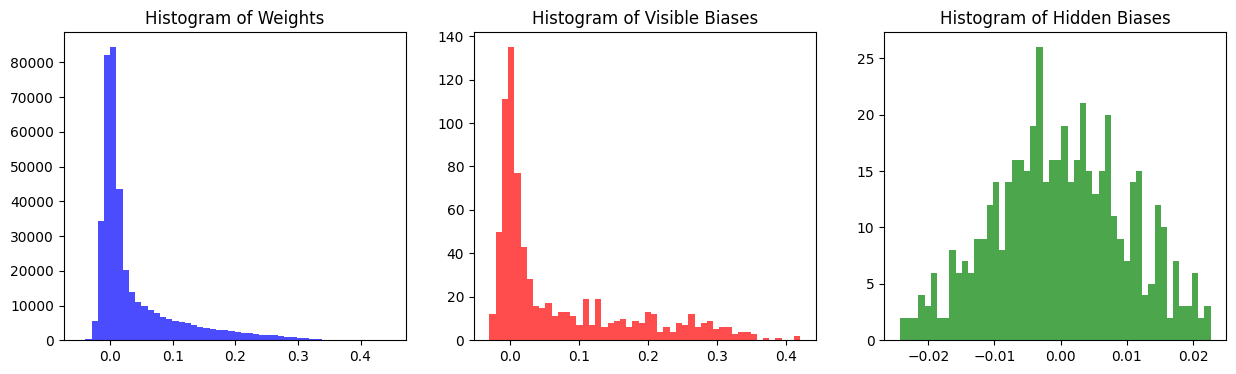

iteration=      0 recon_loss=15237.3800


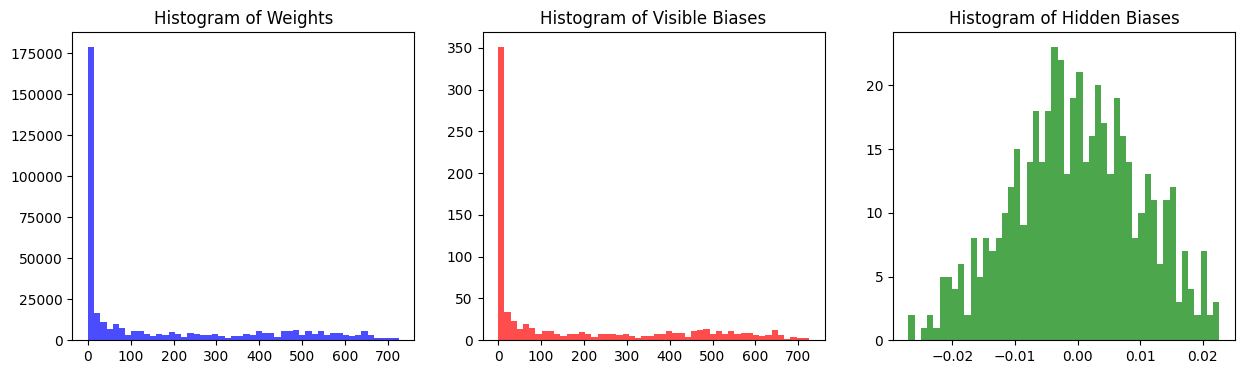

iteration=   2500 recon_loss=14875.2269


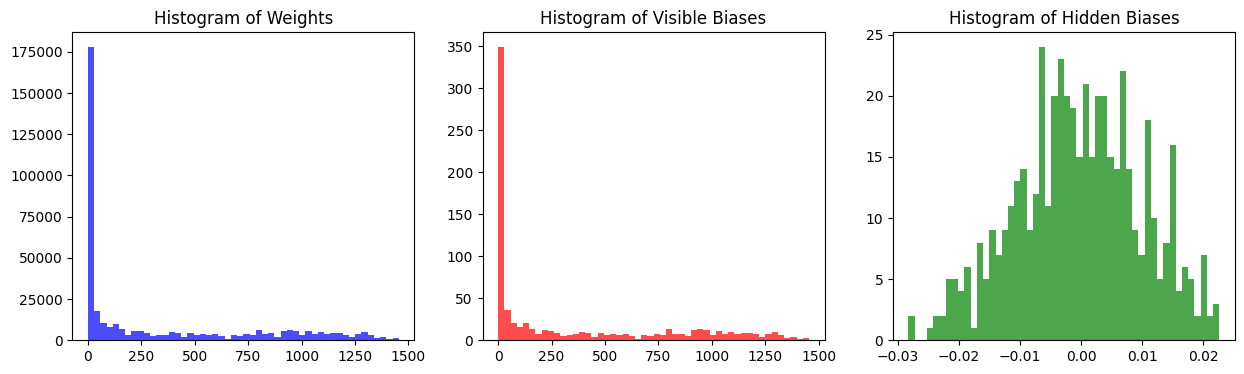

iteration=   5000 recon_loss=14999.2786


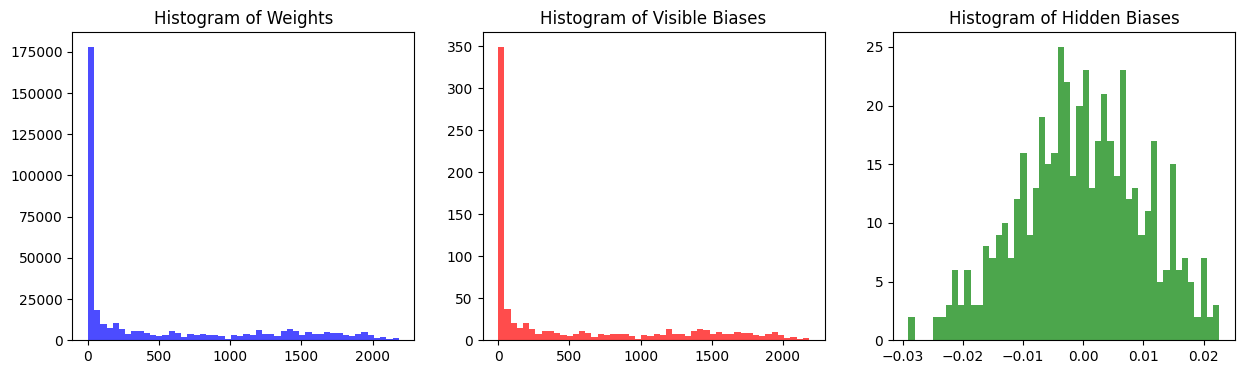

iteration=   7500 recon_loss=15334.1131


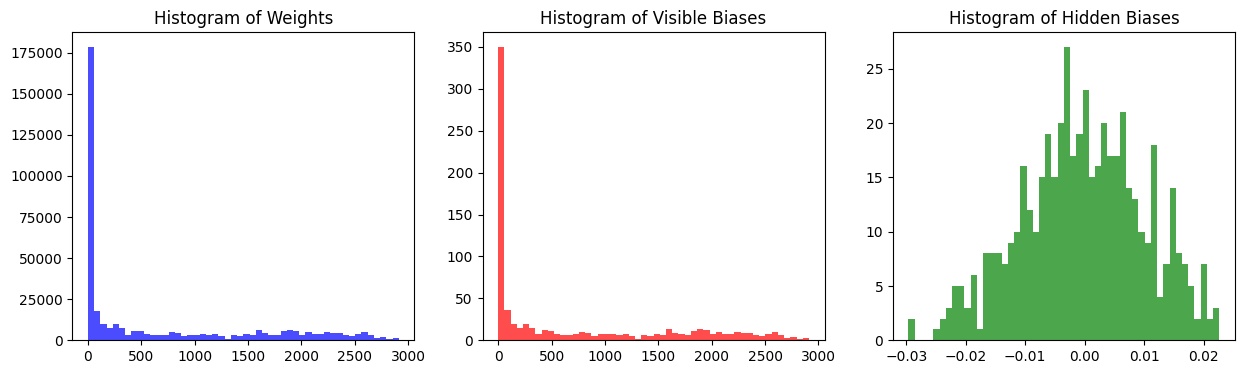

iteration=  10000 recon_loss=16065.1525


In [12]:
from rbm import RestrictedBoltzmannMachine
rbm = RestrictedBoltzmannMachine(
    ndim_visible=784, ndim_hidden=500, batch_size=20, is_bottom=True, show_histograms=True
)
rbm.cd1(X_train)

## 4.1.2 Analysing the Average Reconstruction Loss

learning CD1
iteration=      0 recon_loss=15033.6821
iteration=   2500 recon_loss=15341.5313
iteration=   5000 recon_loss=14871.3361
iteration=   7500 recon_loss=13742.8037
iteration=  10000 recon_loss=14791.9804


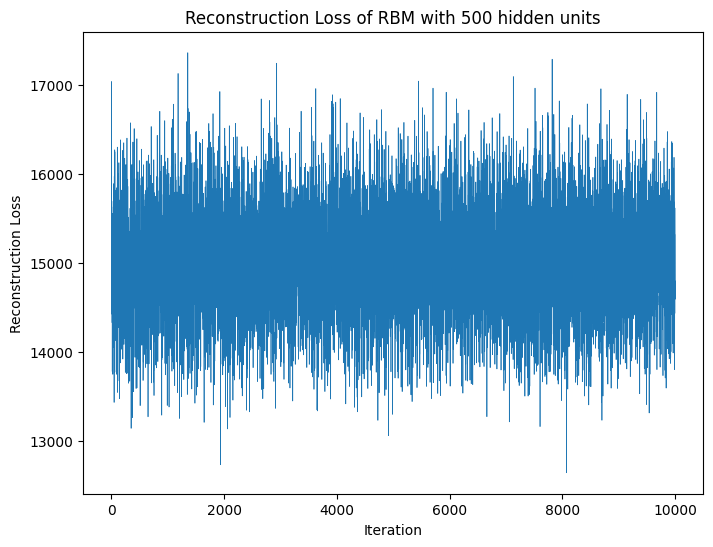

learning CD1
iteration=      0 recon_loss=15435.4454
iteration=   2500 recon_loss=14799.5571
iteration=   5000 recon_loss=15201.0524
iteration=   7500 recon_loss=16330.1862
iteration=  10000 recon_loss=14051.7689


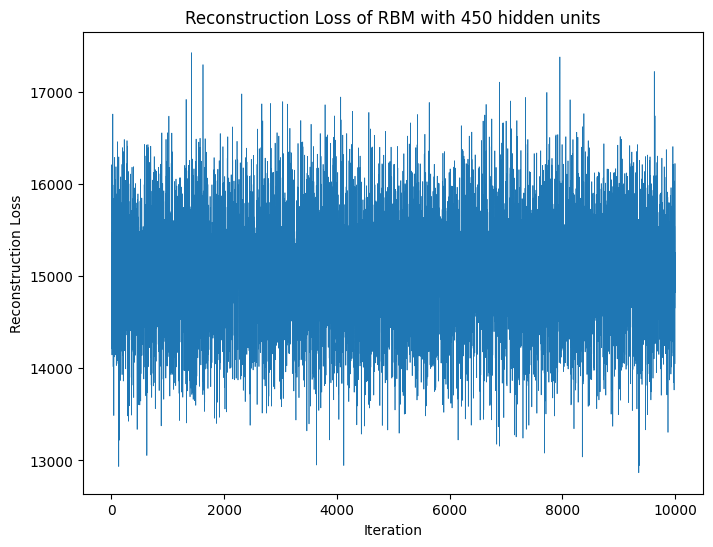

learning CD1
iteration=      0 recon_loss=14706.4415
iteration=   2500 recon_loss=14237.7423
iteration=   5000 recon_loss=15326.0755
iteration=   7500 recon_loss=16077.8041
iteration=  10000 recon_loss=15272.0383


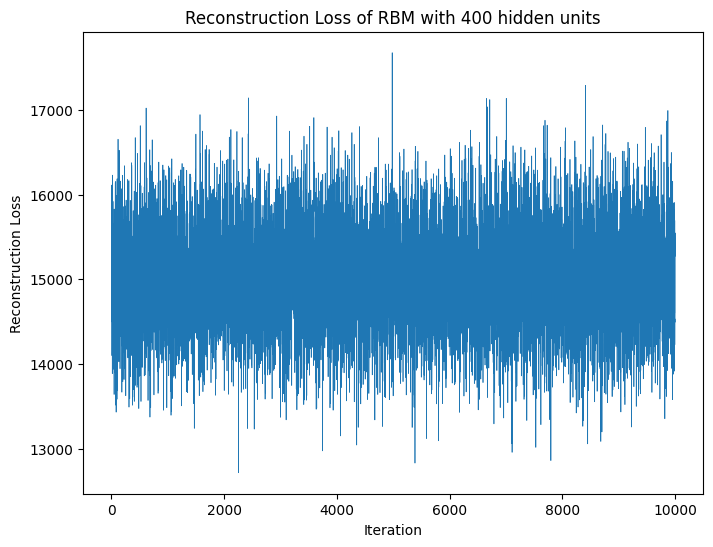

learning CD1
iteration=      0 recon_loss=16353.5855
iteration=   2500 recon_loss=15096.2645
iteration=   5000 recon_loss=15639.6719
iteration=   7500 recon_loss=14770.0292
iteration=  10000 recon_loss=14263.3617


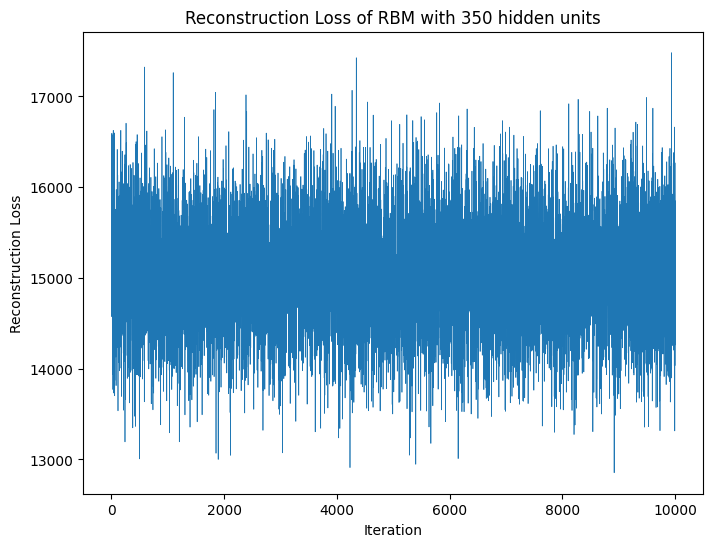

learning CD1
iteration=      0 recon_loss=15896.1241
iteration=   2500 recon_loss=14958.3711
iteration=   5000 recon_loss=14651.5415
iteration=   7500 recon_loss=14498.8134
iteration=  10000 recon_loss=14853.3445


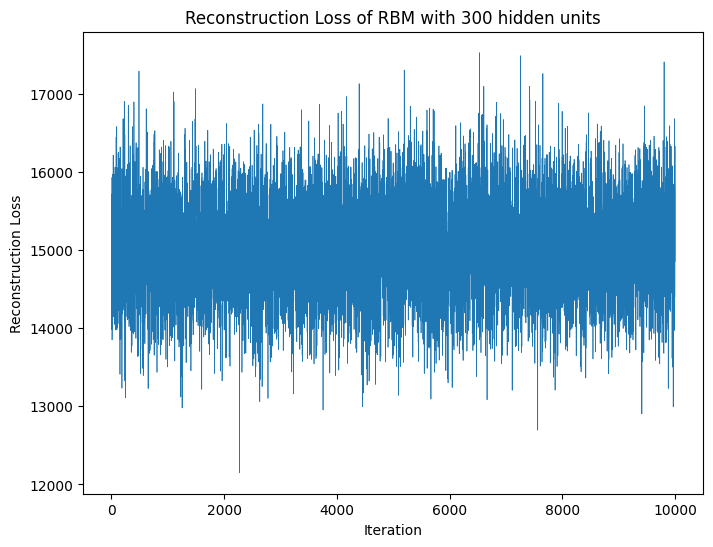

learning CD1
iteration=      0 recon_loss=15137.8237
iteration=   2500 recon_loss=14545.8745
iteration=   5000 recon_loss=15337.2065
iteration=   7500 recon_loss=14743.0860
iteration=  10000 recon_loss=15030.8277


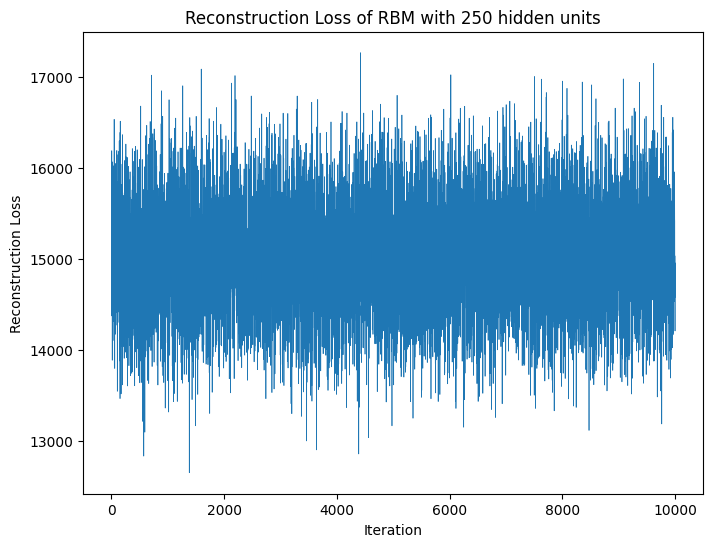

learning CD1
iteration=      0 recon_loss=15074.6314
iteration=   2500 recon_loss=15452.1186
iteration=   5000 recon_loss=16007.5403
iteration=   7500 recon_loss=14283.8938
iteration=  10000 recon_loss=15314.2161


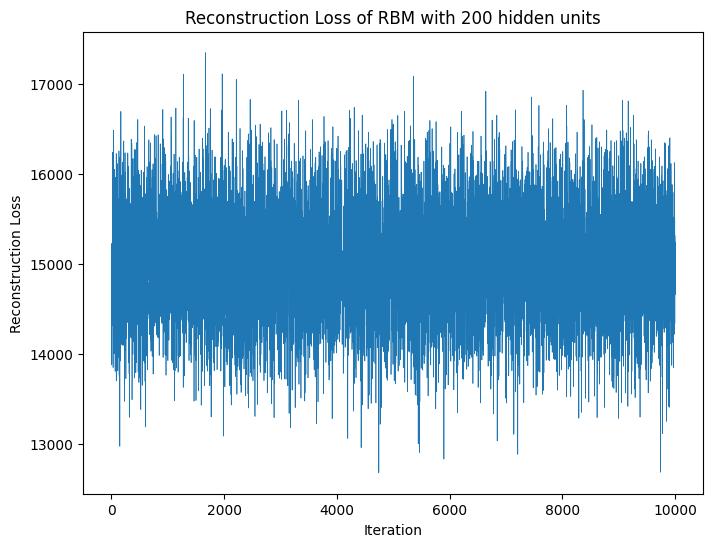

learning CD1
iteration=      0 recon_loss=14906.0440
iteration=   2500 recon_loss=15190.9233
iteration=   5000 recon_loss=15312.3175
iteration=   7500 recon_loss=14231.3532
iteration=  10000 recon_loss=15135.7575


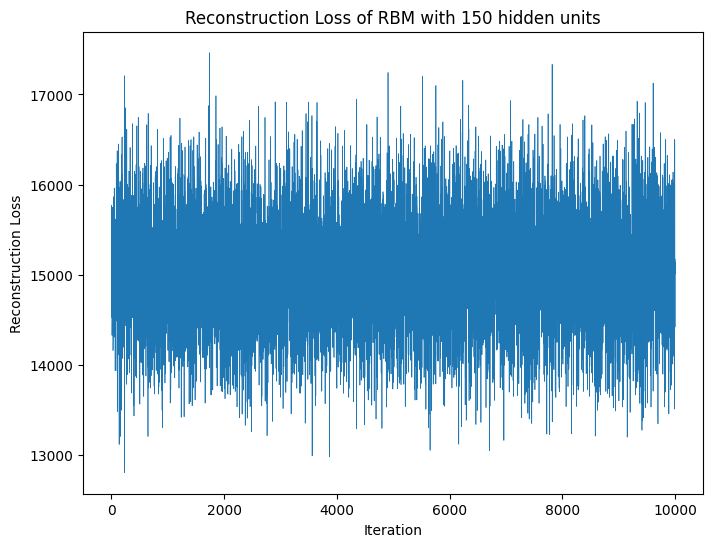

learning CD1
iteration=      0 recon_loss=15861.7629
iteration=   2500 recon_loss=15259.7306
iteration=   5000 recon_loss=14987.1922
iteration=   7500 recon_loss=15770.4612
iteration=  10000 recon_loss=15058.4909


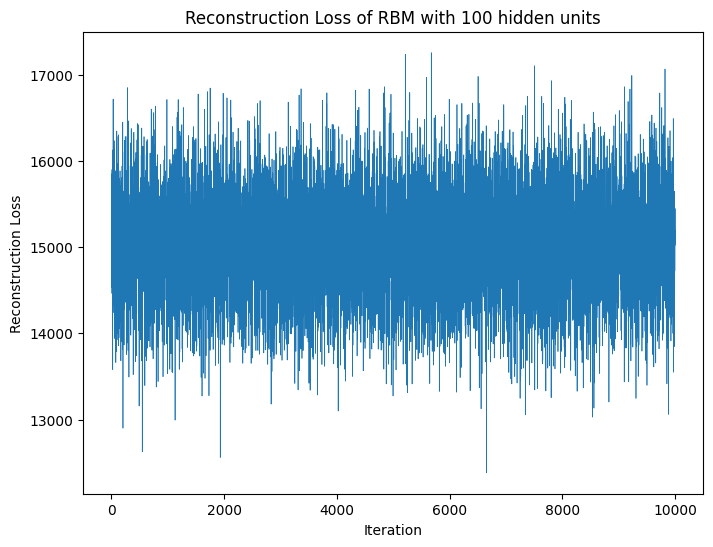

learning CD1
iteration=      0 recon_loss=15362.2619
iteration=   2500 recon_loss=13665.9162
iteration=   5000 recon_loss=14593.3227
iteration=   7500 recon_loss=15839.0836
iteration=  10000 recon_loss=14150.5304


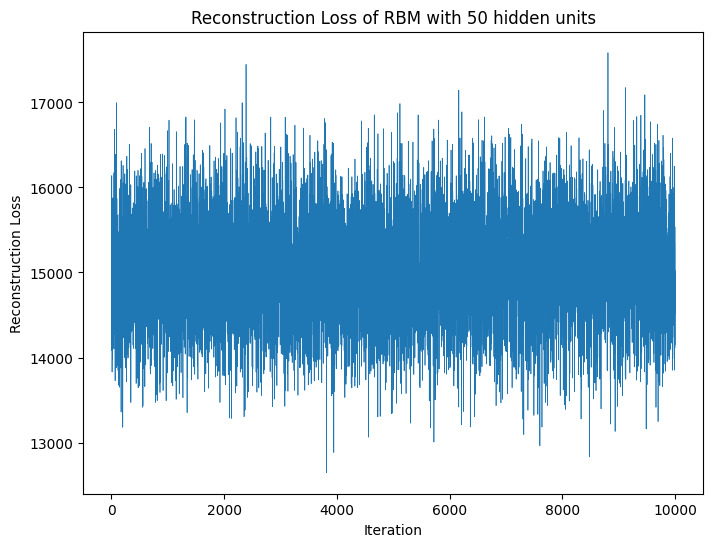

learning CD1
iteration=      0 recon_loss=13558.5495
iteration=   2500 recon_loss=15171.3424
iteration=   5000 recon_loss=13665.6276
iteration=   7500 recon_loss=15581.2268
iteration=  10000 recon_loss=14942.4755


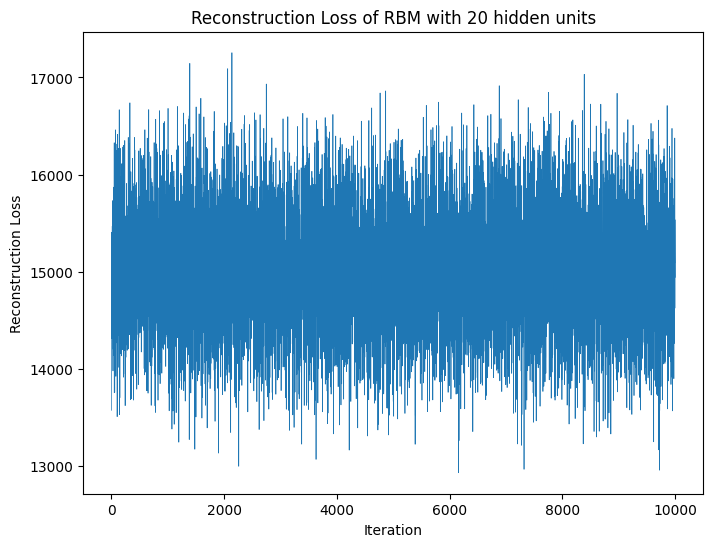

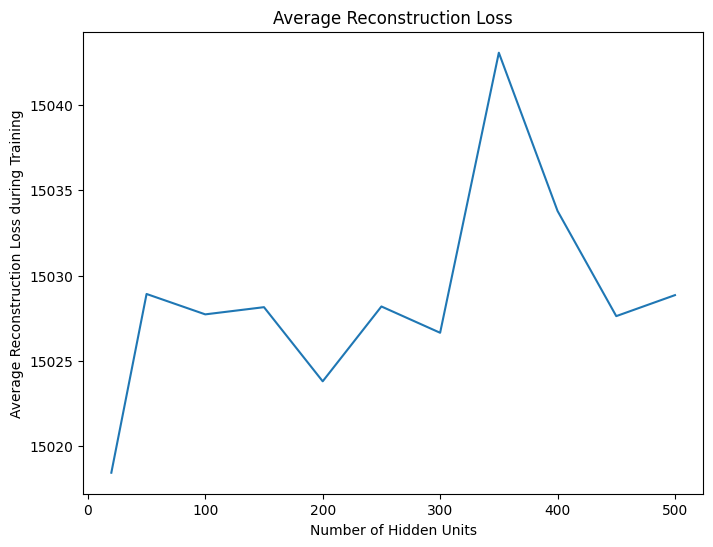

In [5]:
avg_loss = []

hidden_units_range = [500, 450, 400, 350, 300, 250, 200, 150, 100, 50, 20]
for hidden_units in hidden_units_range:
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=784, ndim_hidden=hidden_units, batch_size=20, is_bottom=True
    )
    rbm.cd1(X_train, n_iterations=10000)

    reconstruction_loss = rbm.fetch_reconstruction_loss()

    plt.figure(figsize=(8, 6))
    plt.plot(reconstruction_loss, linewidth=0.5)
    plt.title(f'Reconstruction Loss of RBM with {hidden_units} hidden units')

    plt.xlabel('Iteration')
    plt.ylabel('Reconstruction Loss')
    plt.show()

    avg_loss.append(sum(reconstruction_loss) / len(reconstruction_loss))

plt.figure(figsize=(8,6))
plt.plot(hidden_units_range[::-1], avg_loss[::-1])
plt.title('Average Reconstruction Loss')

plt.xlabel('Number of Hidden Units')
plt.ylabel('Average Reconstruction Loss during Training')
plt.show()

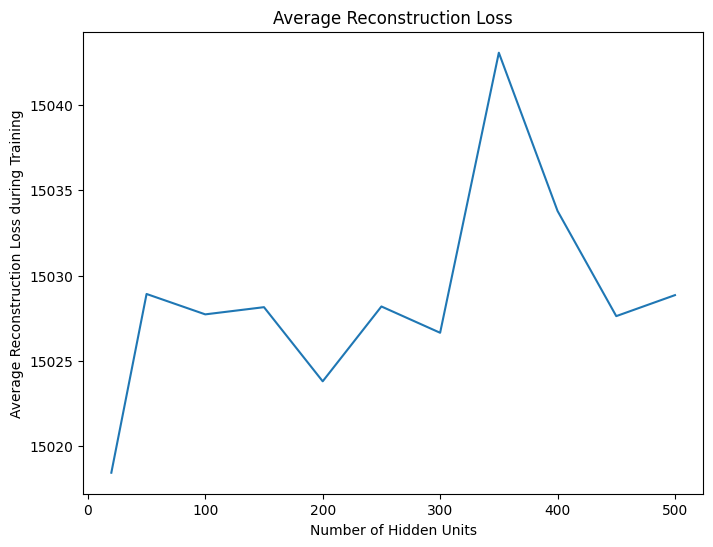

In [9]:
plt.figure(figsize=(8,6))
plt.plot(hidden_units_range[::-1], avg_loss[::-1])
plt.title('Average Reconstruction Loss')

# plt.ylim(5000, 20000)
plt.xlabel('Number of Hidden Units')
plt.ylabel('Average Reconstruction Loss during Training')
plt.show()

## 4.1.3 Studying Receptive Fields

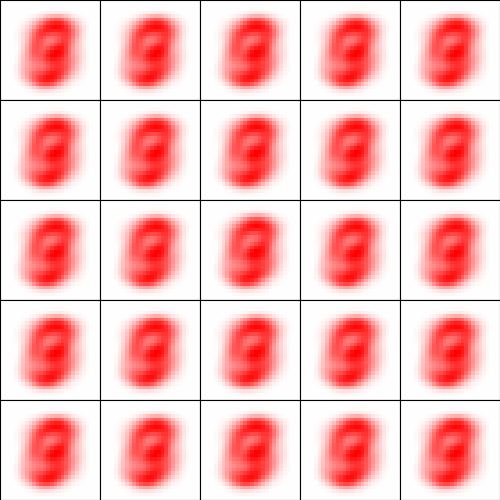

Interpretation of the Receptive Fields
1. Blurred, Averaged Features:

The receptive fields show a blurred version of a digit (likely "8"), suggesting that each hidden unit has learned to represent a general template of that digit. This blurriness occurs because the hidden units are capturing the statistical structure of the data rather than memorizing specific examples.

2. Mode Collapse or Bias in Learning

Even though the dataset is uniformly distributed, the RBM might have learned to emphasize features that are common across multiple digits.
The digit "8" contains symmetric and closed-loop structures, which might be features that maximize activation across different digits (e.g., "0", "3", "6", "9"). Some hidden units may have converged to an "average" of many digits, and "8" appears as the dominant pattern.

The training process may have encouraged hidden units to capture shared structures rather than distinguishing between individual digits.
For example:
"0" and "8" both have circular shapes.
"3", "5", and "8" share curved structures.
This overlap could have led to a dominant "8"-like shape in the receptive fields.
